In [70]:
#RANDOM FOREST

In [71]:
# IMPORT LIBRARIES

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
#LOAD DATASET

data = pd.read_csv('aml_train.csv')

In [73]:
#PRINT FIRST 5 ROW

data.head()

step   paytype   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0   C553264065             0.0             0.0        1               0  
1    C38997010         21182.0             0.0        1               0  
2   C972765878             0.0             0.0        1               0  
3  C1007251739         26202.0             0.0        1               0  
4  C1848415041             0.0             0.0        1               0

In [74]:
#REMOVING THE UNWANTED FEATURES
data.drop('step',axis=1,inplace=True)
data.drop('nameOrig', axis=1, inplace=True)
data.drop('nameDest', axis=1, inplace=True)
data.drop('isFlaggedFraud', axis=1, inplace=True)

data.head(-3)


paytype    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     TRANSFER    181.00          181.0            0.00             0.0   
1     CASH_OUT    181.00          181.0            0.00         21182.0   
2     TRANSFER   2806.00         2806.0            0.00             0.0   
3     CASH_OUT   2806.00         2806.0            0.00         26202.0   
4     TRANSFER  20128.00        20128.0            0.00             0.0   
...        ...       ...            ...             ...             ...   
2257   PAYMENT   5880.33        11593.0         5712.67             0.0   
2258   PAYMENT  14025.72        20309.0         6283.28             0.0   
2259   PAYMENT  12187.88        22472.0        10284.12             0.0   
2260   PAYMENT  10777.89       105804.0        95026.11             0.0   
2261   PAYMENT    708.82        43324.0        42615.18             0.0   

      newbalanceDest  isFraud  
0                0.0        1  
1                0.0        1  
2                0.0        1  
3                0.0        1  
4                0.0        1  
...              ...      ...  
2257             0.0        0  
2258             0.0        0  
2259             0.0        0  
2260             0.0        0  
2261             0.0        0  

[2262 rows x 7 columns]

In [75]:
#USING LABELENCODER CONVERT CATEGORICAL VALUE TO NUMERICAL VALUE

from sklearn.preprocessing import LabelEncoder
import pickle

# Assuming 'payment' is a categorical column in your DataFrame
type_data = data['paytype']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the payment data
type_encoded = label_encoder.fit_transform(type_data)

# Replace the original 'payment' column with the encoded values
data['type_encoded'] = type_encoded

with open('type_encoded.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [76]:
#PRINT THE FIRST 5 ROW
data.head()

paytype   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0  TRANSFER    181.0          181.0             0.0             0.0   
1  CASH_OUT    181.0          181.0             0.0         21182.0   
2  TRANSFER   2806.0         2806.0             0.0             0.0   
3  CASH_OUT   2806.0         2806.0             0.0         26202.0   
4  TRANSFER  20128.0        20128.0             0.0             0.0   

   newbalanceDest  isFraud  type_encoded  
0             0.0        1             4  
1             0.0        1             1  
2             0.0        1             4  
3             0.0        1             1  
4             0.0        1             4

In [77]:
#CHECKING FOR ANY NULL VALUES
print('Null Values =',data.isnull().values.any())

Null Values = False


In [78]:
#DROP NULL VALUE, IF ANY NULL VALUE EXIST IN DATASET
data=data.dropna()

#CHECKING FOR ANY NULL VALUES
print('Null Values =',data.isnull().values.any())

Null Values = False


In [79]:
# Preprocess data
# Feature engineering, data cleaning, normalization, etc.
data.drop('paytype', axis=1,inplace=True)
data.head()


amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0    181.0          181.0             0.0             0.0             0.0   
1    181.0          181.0             0.0         21182.0             0.0   
2   2806.0         2806.0             0.0             0.0             0.0   
3   2806.0         2806.0             0.0         26202.0             0.0   
4  20128.0        20128.0             0.0             0.0             0.0   

   isFraud  type_encoded  
0        1             4  
1        1             1  
2        1             4  
3        1             1  
4        1             4

In [80]:
type_removed = data
X = type_removed.drop('isFraud', axis=1)
y = data['isFraud']
print(X)

        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0       181.00          181.0            0.00             0.0             0.0   
1       181.00          181.0            0.00         21182.0             0.0   
2      2806.00         2806.0            0.00             0.0             0.0   
3      2806.00         2806.0            0.00         26202.0             0.0   
4     20128.00        20128.0            0.00             0.0             0.0   
...        ...            ...             ...             ...             ...   
2260  10777.89       105804.0        95026.11             0.0             0.0   
2261    708.82        43324.0        42615.18             0.0             0.0   
2262   5633.30        61694.0        56060.70         49578.0             0.0   
2263   2223.41           17.0            0.00             0.0             0.0   
2264   2195.63         9320.0         7124.37             0.0             0.0   

      type_encoded  
0     

In [81]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
2260    0
2261    0
2262    0
2263    0
2264    0
Name: isFraud, Length: 2265, dtype: int64


isFraud
0    1133
1    1132
Name: count, dtype: int64


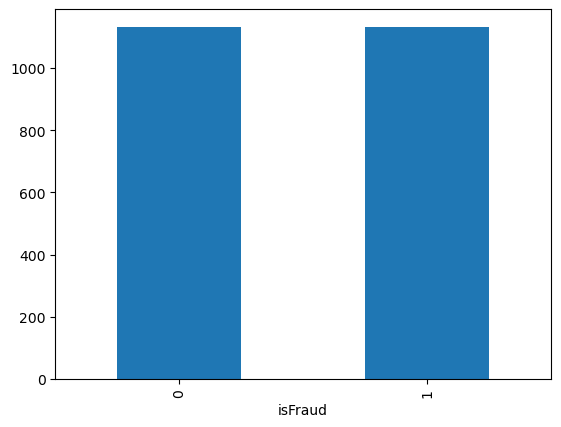

In [82]:
#checking if target class is balanced or not

# df = df.sample()
# print(df.head(-3))
data.isFraud.value_counts().plot.bar()
print(data.isFraud.value_counts())

In [83]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# print(data.head())

In [85]:
#TRAINING

In [86]:
# Initialize and train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

with open('clf_rf.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [87]:
# Make predictions
with open('clf_rf.pkl', 'rb') as f:
    my_clf = pickle.load(f)
y_pred = my_clf.predict(X_test)

#print(y_pred[0])

In [88]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9801324503311258
Confusion Matrix:
 [[219   4]
 [  5 225]]


In [89]:
#TESTING DATASET

In [90]:
test_data = pd.read_csv('test_data_aml.csv')
test_data.head()


step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0    94  TRANSFER  2169679.91   C358188091     2169679.91             0.0   
1    94  CASH_OUT  2169679.91   C395839623     2169679.91             0.0   
2    94  TRANSFER  1454592.61   C708686257     1454592.61             0.0   
3    94  CASH_OUT  1454592.61   C824268591     1454592.61             0.0   
4    94  TRANSFER   460635.82  C1586676521      460635.82             0.0   

     nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  C329029721            0.00            0.00        1               0  
1  C925758982            0.00      2169679.91        1               0  
2  C191950817            0.00            0.00        1               0  
3  C819390198       264042.92      1718635.53        1               0  
4   C94475674            0.00            0.00        1               0

In [91]:
#REMOVING THE UNWANTED FEATURES
test_data.drop('step',axis=1,inplace=True)
test_data.drop('nameOrig', axis=1, inplace=True)
test_data.drop('nameDest', axis=1, inplace=True)
test_data.drop('isFlaggedFraud', axis=1, inplace=True)

test_data.head(-3)

type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0  TRANSFER  2169679.91     2169679.91            0.00            0.00   
1  CASH_OUT  2169679.91     2169679.91            0.00            0.00   
2  TRANSFER  1454592.61     1454592.61            0.00            0.00   
3  CASH_OUT  1454592.61     1454592.61            0.00       264042.92   
4  TRANSFER   460635.82      460635.82            0.00            0.00   
5   PAYMENT     4852.65       30128.26        25275.61            0.00   
6   PAYMENT    13343.47       25275.61        11932.14            0.00   

   newbalanceDest  isFraud  
0            0.00        1  
1      2169679.91        1  
2            0.00        1  
3      1718635.53        1  
4            0.00        1  
5            0.00        0  
6            0.00        0

In [92]:
import pickle

label_encoder = None
# label_encoder = joblib.load('type_encoded.pkl')
with open('type_encoded.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [93]:
##encode paytype

test_data['type_encoded'] = label_encoder.transform(test_data['type'])

#Drop the original 'type' column if needed
test_data.drop(columns=['type'], inplace=True)

# Display the updated DataFrame
print(test_data.head())

       amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0  2169679.91     2169679.91             0.0            0.00            0.00   
1  2169679.91     2169679.91             0.0            0.00      2169679.91   
2  1454592.61     1454592.61             0.0            0.00            0.00   
3  1454592.61     1454592.61             0.0       264042.92      1718635.53   
4   460635.82      460635.82             0.0            0.00            0.00   

   isFraud  type_encoded  
0        1             4  
1        1             1  
2        1             4  
3        1             1  
4        1             4  


In [94]:
# Make predictions
with open('clf_rf.pkl', 'rb') as f:
    my_clf = pickle.load(f)
y_pred = my_clf.predict(X_test)

In [95]:
test_data_features = test_data.drop(columns=['isFraud'])
print(len(test_data))
test_data.head(-3)

10


amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0  2169679.91     2169679.91            0.00            0.00            0.00   
1  2169679.91     2169679.91            0.00            0.00      2169679.91   
2  1454592.61     1454592.61            0.00            0.00            0.00   
3  1454592.61     1454592.61            0.00       264042.92      1718635.53   
4   460635.82      460635.82            0.00            0.00            0.00   
5     4852.65       30128.26        25275.61            0.00            0.00   
6    13343.47       25275.61        11932.14            0.00            0.00   

   isFraud  type_encoded  
0        1             4  
1        1             1  
2        1             4  
3        1             1  
4        1             4  
5        0             3  
6        0             3

In [96]:

# Iterate through each row in the test data
wrongConter = 0
totalPreds = 0
for index, row in test_data_features.iterrows():
    # Extract features from the row
    features = row.values.reshape(1, -1)
    totalPreds = totalPreds +1
    # Make predictions
    predictions = my_clf.predict(features)

  #  # Print the actual and predicted results
    print("Actual:", test_data.at[index, 'isFraud'])  # assuming 'isFraud' is the target column
    print("Predicted:", predictions)
    if int(test_data.at[index, 'isFraud']) !=int(predictions[0]):
      wrongConter = wrongConter + 1
print("Total Wrong predictions >>",wrongConter)
print("Total predictions >>",totalPreds,">>>>>>>>>>>>>>>>", float(wrongConter/totalPreds)*100  ,"%")

Actual: 1
Predicted: [1]
Actual: 1
Predicted: [1]
Actual: 1
Predicted: [1]
Actual: 1
Predicted: [1]
Actual: 1
Predicted: [1]
Actual: 0
Predicted: [0]
Actual: 0
Predicted: [0]
Actual: 0
Predicted: [0]
Actual: 0
Predicted: [0]
Actual: 0
Predicted: [0]
Total Wrong predictions >> 0
Total predictions >> 10 >>>>>>>>>>>>>>>> 0.0 %


In [98]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9801324503311258
Confusion Matrix:
 [[219   4]
 [  5 225]]
